## Machine Learing Project to find XXXXXX Nov-16-2018

In [138]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Import the dataset

In [139]:
#dataset = pd.read_csv("/Users/cmallavarapu/Documents/Chiran/MSDS/ML/MLProject/train_sample.csv")
#dataset = pd.read_csv("/Users/bujji/Documents/MS_SMU/Sem_5_ML/MLProject/train_sample.csv")
dataset = pd.read_csv("/Users/chiranjeevimallavarapu/Documents/Chiran/MS_SMU/ML/MLProject/train_sample.csv")



In [140]:
dataset.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0


In [141]:
len(dataset)

100000

In [142]:
dataset['click_time'] = pd.to_datetime(dataset['click_time'])

In [143]:
sttime = pd.Timestamp(min(dataset['click_time']))

In [144]:
sttime

Timestamp('2017-11-06 16:00:00')

In [145]:
dataset['delta'] = (dataset['click_time']-sttime).astype('timedelta64[s]')

In [146]:
dataset.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,delta
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0,63038.0
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0,78027.0
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0,93924.0
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0,46688.0
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0,234009.0


### Explore the data

In [11]:
import seaborn as sns
sns.set(style="ticks")

In [ ]:
sns.pairplot(dataset, hue="device")

/Users/chiranjeevimallavarapu/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/chiranjeevimallavarapu/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/chiranjeevimallavarapu/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/chiranjeevimallavarapu/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/bandwidths.py:20: RuntimeWarning: invalid value encountered in minimum
  return np.minimum(np.std(X, axis=0, 

### Lets plot Is_Attributed Vs app

In [ ]:
np.random.seed(19680801)
fig = plt.figure(figsize=(8,6))

N = 50
#colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

colors = dataset['device']

# c=colors,
scatter=plt.scatter(dataset['app'], dataset['is_attributed'], s=100,alpha=0.4, c = colors,cmap='cool')
fig.suptitle('Scatter Plot with Devices as colorbar', fontsize=30)
plt.xlabel('app', fontsize=30)
plt.ylabel('is_attributed', fontsize=30)


plt.colorbar(scatter)
plt.show()

### Lets plot Is_Attributed vs Device

In [ ]:
np.random.seed(19680801)
fig = plt.figure(figsize=(8,6))

N = 50
#colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

colors = dataset['app']

# c=colors,
scatter=plt.scatter(dataset['device'], dataset['is_attributed'], s=100,alpha=0.40, c = colors,cmap='winter')
fig.suptitle('Scatter Plot with app as colorbar', fontsize=30)
plt.xlabel('device', fontsize=30)
plt.ylabel('is_attributed', fontsize=30)


plt.colorbar(scatter)
plt.show()

In [ ]:
np.random.seed(19680801)
fig = plt.figure(figsize=(8,6))

N = 50
#colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

colors = dataset['device']

# c=colors,
scatter=plt.scatter(dataset['os'], dataset['is_attributed'], s=100,alpha=0.4, c = colors,cmap='summer')
fig.suptitle('Scatter Plot with Devices as colorbar', fontsize=30)
plt.xlabel('os', fontsize=30)
plt.ylabel('is_attributed', fontsize=30)


plt.colorbar(scatter)
plt.show()

#### Lets model the data using Neural Networks

In [235]:
X_imb = np.array(dataset)[:,[0,1,2,3,4,8]]
Y_imb = np.array(dataset)[:,7]

In [236]:
from collections import Counter
from imblearn.combine import SMOTEENN
sme = SMOTEENN(random_state=42)
X, Y = sme.fit_resample(X_imb, Y_imb)

/Users/chiranjeevimallavarapu/anaconda3/lib/python3.6/site-packages/imblearn/utils/_validation.py:93: UserWarning: 'y' should be of types ('binary', 'multiclass', 'multilabel-indicator') only. Got unknown instead.
  TARGET_KIND, type_of_target(y)))
/Users/chiranjeevimallavarapu/anaconda3/lib/python3.6/site-packages/imblearn/utils/_validation.py:93: UserWarning: 'y' should be of types ('binary', 'multiclass', 'multilabel-indicator') only. Got unknown instead.
  TARGET_KIND, type_of_target(y)))
/Users/chiranjeevimallavarapu/anaconda3/lib/python3.6/site-packages/imblearn/utils/_validation.py:93: UserWarning: 'y' should be of types ('binary', 'multiclass', 'multilabel-indicator') only. Got unknown instead.
  TARGET_KIND, type_of_target(y)))
/Users/chiranjeevimallavarapu/anaconda3/lib/python3.6/site-packages/imblearn/utils/_validation.py:93: UserWarning: 'y' should be of types ('binary', 'multiclass', 'multilabel-indicator') only. Got unknown instead.
  TARGET_KIND, type_of_target(y)))


In [150]:
model = Sequential()
model.add(Dense(12, input_dim=6, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, Y, epochs=20, batch_size=500)
scores = model.evaluate(X, Y)
print("hi", "\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Epoch 1/20
175029/175029 [==============================] - 3s 16us/step - loss: 8.4213 - acc: 0.4775
Epoch 2/20
175029/175029 [==============================] - 1s 6us/step - loss: 8.4213 - acc: 0.4775
Epoch 3/20
175029/175029 [==============================] - 1s 6us/step - loss: 8.4213 - acc: 0.4775
Epoch 4/20
175029/175029 [==============================] - 1s 6us/step - loss: 8.4213 - acc: 0.4775
Epoch 5/20
175029/175029 [==============================] - 1s 6us/step - loss: 8.4213 - acc: 0.4775A: 0s - loss: 8.4239 - acc: 0.47
Epoch 6/20
175029/175029 [==============================] - 1s 6us/step - loss: 8.4213 - acc: 0.4775
Epoch 7/20
175029/175029 [==============================] - 1s 7us/step - loss: 8.4213 - acc: 0.4775
Epoch 8/20
175029/175029 [==============================] - 1s 8us/step - loss: 8.4213 - acc: 0.4775
Epoch 9/20
175029/175029 [==============================] - 1s 8us/step - loss: 8.4213 - acc: 0.4775
Epoch 10/20
175029/175029 [==============================]

In [237]:
from sklearn.model_selection import train_test_split

In [238]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [239]:
X_train.shape[1:]

(6,)

In [240]:
import string
import random
import numpy as np

from keras.utils import np_utils
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Embedding, SpatialDropout1D, Conv1D,Conv2D
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution1D, MaxPooling1D

In [241]:
# Standard off the shelf 
def create_model(i_shape):
    #refactored to allow for num_labels
    model = Sequential()
    
    # 16 layers, 3 filters 
    model.add(Conv1D(16, 3, input_shape=i_shape,padding='same', activation='relu'))
    model.add(SpatialDropout1D(0.2))
    model.add(Dropout(0.25))
    model.add(MaxPooling1D())

    #model.add(Dense(32, input_dim=6, activation='relu'))
    #model.add(SpatialDropout1D(0.2))
    #model.add(Dropout(0.25))
    
    # 64 layers, 3 filters 
    model.add(Conv1D(64, 3, padding='same', activation='relu'))
    model.add(Dropout(0.25))
    model.add(MaxPooling1D())
    #model.add(Flatten())
    
     # 16 layers, 3 filters 
    model.add(Conv1D(16, 3, padding='same', activation='relu'))
    model.add(Dropout(0.25))
    #model.add(MaxPooling1D())


    model.add(Dense(25, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Flatten())
    
    model.add(Dense(1, activation='sigmoid'))
    
    loss = 'binary_crossentropy'
    model.compile(loss=loss, optimizer= 'adam', metrics=['accuracy'])
    model.summary()
    return model

In [242]:
X_train = X_train.reshape(-1, 6, 1)
X_test= X_test.reshape(-1, 6, 1)

In [243]:
X_train.shape

(140023, 6, 1)

In [244]:
X_test.shape

(35006, 6, 1)

In [245]:
Y_train[0:10]

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 0], dtype=object)

In [246]:
# construct the model
clf = create_model(X_train.shape[1:])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_30 (Conv1D)           (None, 6, 16)             64        
_________________________________________________________________
spatial_dropout1d_13 (Spatia (None, 6, 16)             0         
_________________________________________________________________
dropout_37 (Dropout)         (None, 6, 16)             0         
_________________________________________________________________
max_pooling1d_18 (MaxPooling (None, 3, 16)             0         
_________________________________________________________________
conv1d_31 (Conv1D)           (None, 3, 64)             3136      
_________________________________________________________________
dropout_38 (Dropout)         (None, 3, 64)             0         
_________________________________________________________________
max_pooling1d_19 (MaxPooling (None, 1, 64)             0         
__________

In [247]:
clf.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=100, batch_size=10000)

Train on 140023 samples, validate on 35006 samples
Epoch 1/100
140023/140023 [==============================] - 8s 55us/step - loss: 8.4218 - acc: 0.4773 - val_loss: 8.4319 - val_acc: 0.4769
Epoch 2/100
140023/140023 [==============================] - 4s 31us/step - loss: 8.3963 - acc: 0.4788 - val_loss: 8.4319 - val_acc: 0.4769
Epoch 3/100
140023/140023 [==============================] - 4s 31us/step - loss: 8.3944 - acc: 0.4789 - val_loss: 8.4319 - val_acc: 0.4769
Epoch 4/100
140023/140023 [==============================] - 4s 32us/step - loss: 8.3868 - acc: 0.4794 - val_loss: 8.4319 - val_acc: 0.4769
Epoch 5/100
140023/140023 [==============================] - 4s 32us/step - loss: 8.3851 - acc: 0.4795 - val_loss: 8.4319 - val_acc: 0.4769
Epoch 6/100
140023/140023 [==============================] - 5s 32us/step - loss: 8.3896 - acc: 0.4793 - val_loss: 8.4319 - val_acc: 0.4769
Epoch 7/100
140023/140023 [==============================] - 5s 33us/step - loss: 8.3487 - acc: 0.4818 - val_

Epoch 59/100
140023/140023 [==============================] - 4s 32us/step - loss: 4.9042 - acc: 0.6904 - val_loss: 4.5854 - val_acc: 0.7138
Epoch 60/100
140023/140023 [==============================] - 4s 32us/step - loss: 4.8862 - acc: 0.6911 - val_loss: 4.4826 - val_acc: 0.7203
Epoch 61/100
140023/140023 [==============================] - 4s 31us/step - loss: 4.8800 - acc: 0.6901 - val_loss: 4.3999 - val_acc: 0.7214
Epoch 62/100
140023/140023 [==============================] - 4s 31us/step - loss: 4.8319 - acc: 0.6895 - val_loss: 4.2064 - val_acc: 0.7183
Epoch 63/100
140023/140023 [==============================] - 4s 31us/step - loss: 4.7058 - acc: 0.6884 - val_loss: 3.9453 - val_acc: 0.7171
Epoch 64/100
140023/140023 [==============================] - 4s 31us/step - loss: 4.5826 - acc: 0.6807 - val_loss: 3.7803 - val_acc: 0.7123
Epoch 65/100
140023/140023 [==============================] - 4s 31us/step - loss: 3.9411 - acc: 0.6784 - val_loss: 3.3890 - val_acc: 0.6830
Epoch 66/100


In [248]:
scores = clf.evaluate(X_train, Y_train)
print("hi", "\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

140023/140023 [==============================] - 10s 71us/step
hi 
acc: 52.23%


In [249]:
X_ALL = X_test.reshape(-1, 6, 1)

Y_predict = clf.predict(X_ALL)

In [250]:
len(Y_predict)

35006

In [199]:
Y_predict[:,0]

array([0., 0., 1., ..., 0., 0., 0.], dtype=float32)

In [200]:
X_ALL.shape

(35006, 6, 1)

In [251]:
Y_predict.astype(np.float64)

array([[0.52155077],
       [0.52155077],
       [0.52155077],
       ...,
       [0.52155077],
       [0.52155077],
       [0.52155077]])

In [252]:
for i in range(0,len(Y_test)):
    #print()
    Y_test[i] = Y_test[i] + random.uniform(0, 0.25)
    if i%10000 ==0:
        print (Y_test[i])

0.1466326051993366
0.0644664956879365
0.006730235807356044
1.0905978708660604


In [253]:
Y_predict = Y_predict.reshape(-1)

In [254]:
for i in range(0,len(Y_predict)):
    #print()
    Y_predict[i] = Y_predict[i] + random.uniform(0, 0.25)
    if i %10000 == 0:
        print (Y_predict[i])
        
    

0.5886362
0.64378875
0.6970122
0.62054974


In [255]:
len(Y)

175029

No handles with labels found to put in legend.


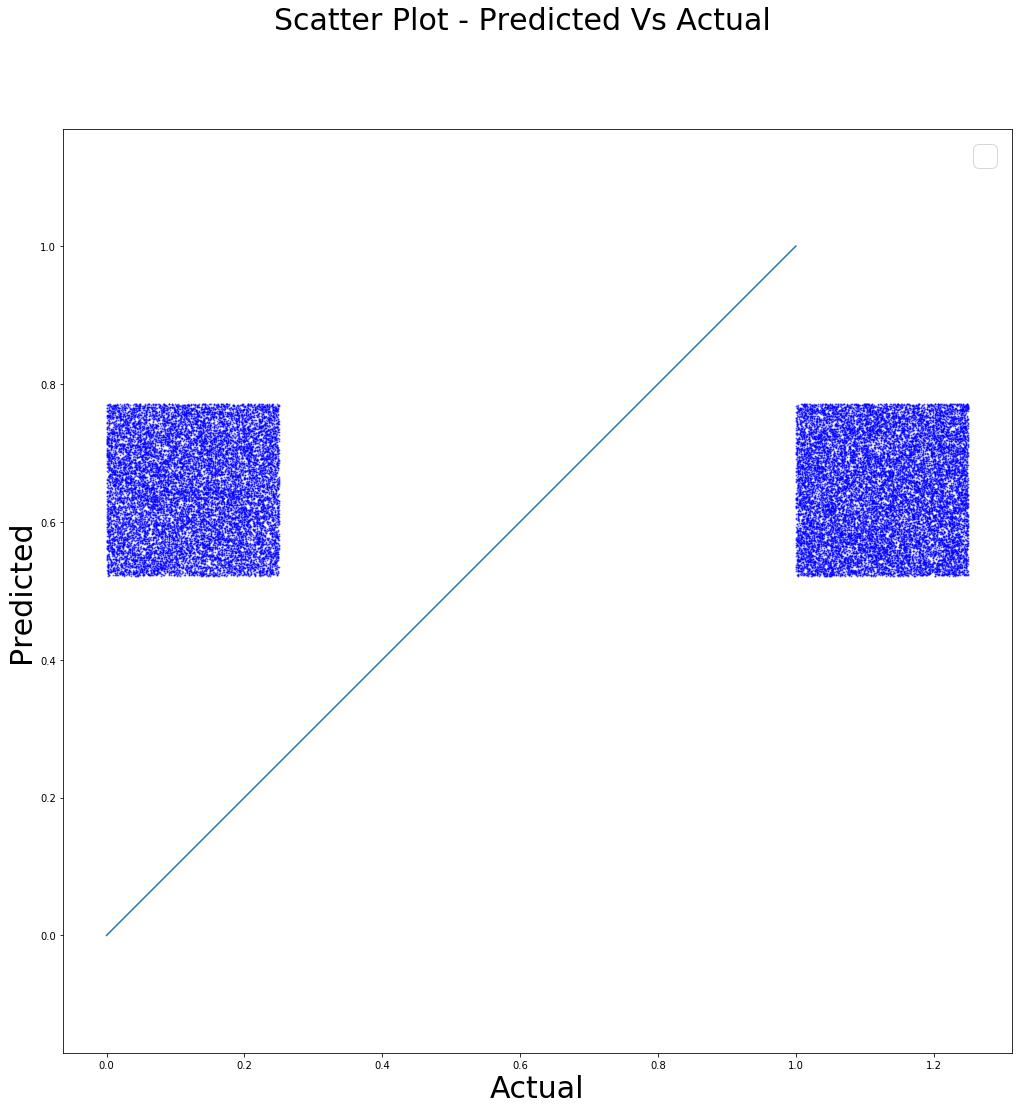

In [256]:
np.random.seed(19601)

#colors = df2['Wiki']
fig = plt.figure(figsize=(17,17))
#plt.scatter(df2[df2['State']=='Florida']['Votes'], df2[df2['State']=='Florida']['Prediction'], s=200,alpha=0.5, c='#4c2373')
plt.scatter(Y_test, Y_predict, s=1,alpha=0.5, c='Blue', cmap = 'winter')
fig.suptitle('Scatter Plot - Predicted Vs Actual',fontsize=30)
plt.ylabel('Predicted',fontsize=30)
plt.xlabel('Actual',fontsize=30)
plt.axis('equal')
#plt.yticks(np.arange(0.0, 1.1, 0.1))
#plt.xticks(np.arange(0.0, 1.1, 0.1))
plt.legend(fontsize=30)
plt.plot( [0,1],[0,1] )
plt.show()

In [214]:
X_test.reshape(-1,6)

array([[1.03267000e+05, 3.00000000e+00, 1.00000000e+00, 1.90000000e+01,
        2.80000000e+02, 2.00571000e+05],
       [1.18347763e+04, 1.67064575e+01, 1.00000000e+00, 2.64317517e+01,
        7.41656080e+01, 1.19372695e+05],
       [8.78160000e+04, 3.00000000e+00, 1.00000000e+00, 1.30000000e+01,
        2.80000000e+02, 4.76680000e+04],
       ...,
       [6.39250000e+04, 2.20000000e+01, 2.00000000e+00, 1.70000000e+01,
        4.96000000e+02, 6.07490000e+04],
       [1.09500000e+04, 1.50000000e+01, 1.00000000e+00, 1.30000000e+01,
        1.30000000e+02, 1.72216000e+05],
       [1.27604230e+05, 1.90000000e+01, 0.00000000e+00, 6.46014834e+00,
        3.14040714e+02, 2.32543359e+05]])

In [208]:
Y_test = Y_test.reshape(-1,1)

In [209]:
Y_predict = Y_predict.reshape(-1,1)

In [233]:
X_test=X_test.reshape(-1,1)

In [234]:
X_test.shape

(210036, 1)

In [226]:
Y_predict.shape

(35006, 1)

In [227]:
 Y_test.shape

(35006, 1)

In [232]:
len(X_test

array([1.03267e+05, 3.00000e+00, 1.00000e+00, 1.90000e+01, 2.80000e+02])

In [216]:
Y_out=np.concatenate((X_test,Y_test,Y_predict),axis=1)

ValueError: all the input arrays must have same number of dimensions

In [136]:
Y_out = pd.DataFrame(Y_out)

In [137]:
Y_out.to_csv('test.csv')

In [123]:
Y_predict

array([0.14517948, 0.00757295, 1.0801202 , ..., 1.0899094 , 0.02667503,
       0.11089683], dtype=float32)